In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('fraud_data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
ar = np.bincount(df['Class'])

In [6]:
per = ar[1]/ar[0]
per

0.016684632328818484

In [7]:
#Question 2

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
accuracy = accuracy_score(y_test, y_majority_predicted)
recall = recall_score(y_test, y_majority_predicted)
(accuracy, recall)

(0.9852507374631269, 0.0)

In [16]:
#Question 3

In [18]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
#svm.score(X_test, y_test)
svm_predict = svm.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
accuracy3 = accuracy_score(y_test, svm_predict)
recall3 = recall_score(y_test, svm_predict)
precision3 = accuracy_score(y_test, svm_predict)

In [21]:
(accuracy3, recall3, precision3)

(0.9907817109144543, 0.375, 0.9907817109144543)

In [22]:
#Question4

In [23]:
svm4 = SVC(C=1e9, gamma = 1e-7).fit(X_train, y_train)

In [44]:
svm4_predict = svm4.predict(X_test)
decisionF = svm4.fit(X_train, y_train).decision_function(X_test)
len(decisionF)

5424

In [49]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, decisionF)
len(thresholds)

4279

In [30]:
thresholds[thresholds > -222] == 1
thresholds[thresholds < -220] == 0

array([False, False, False, ..., False, False, False])

In [31]:
thresholds

array([-839.49094209, -839.42438754, -839.35431775, ..., 3407.46724299,
       3612.72949747, 3953.16482833])

In [50]:
t = decisionF
len(t)

5424

In [51]:
new_t = [1 if i > -220 else 0 for i in t]

In [53]:
confusion4 = confusion_matrix(y_test, new_t)
confusion4

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [54]:
#Question 5

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


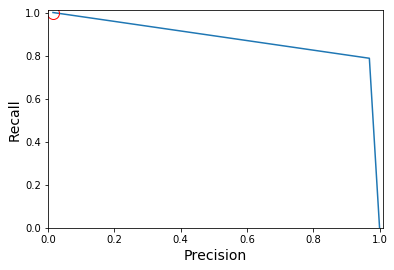

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
lr5 = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr5.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision_Recall_Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle='none', c = 'r')
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize=14)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "Lower right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


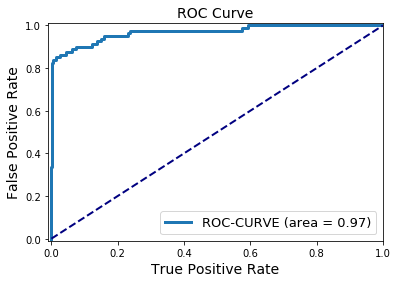

In [66]:
from sklearn.metrics import roc_curve, auc
y_lr_roc = lr5.fit(X_train, y_train).decision_function(X_test)
fp_lr, tp_lr, _ = roc_curve(y_test, y_lr_roc)
roc_auc_lr = auc(fp_lr, tp_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fp_lr, tp_lr, lw=3, label='ROC-CURVE (area = {:.2f})'.format(roc_auc_lr))
plt.xlabel('True Positive Rate', fontsize = 14)
plt.ylabel('False Positive Rate', fontsize = 14)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc = 'Lower right', fontsize=13)
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle = '--')
plt.show()

In [61]:
y_proba_lr = lr5.fit(X_train, y_train).predict_proba(X_test)
y_proba_lr

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[9.98749097e-01, 1.25090276e-03],
       [9.98542154e-01, 1.45784622e-03],
       [9.97504694e-01, 2.49530568e-03],
       ...,
       [9.97862539e-01, 2.13746133e-03],
       [9.99587072e-01, 4.12927632e-04],
       [9.98022352e-01, 1.97764823e-03]])

In [68]:
print (0.85, 0.16)

0.85 0.16


In [69]:
#Question 6

In [100]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#penalty = {'penalty': ['11', '12']}
grid = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}
C = [0.01, 0.1, 1, 10, 100]
clf7 = LogisticRegression()

In [113]:
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression()
gird_clf3 = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall', cv= 3)
gird_clf3.fit(X_train, y_train)
result = gird_clf3.cv_results_['mean_test_score'].reshape(5, 2)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [114]:
result

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

In [115]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

<IPython.core.display.Javascript object>


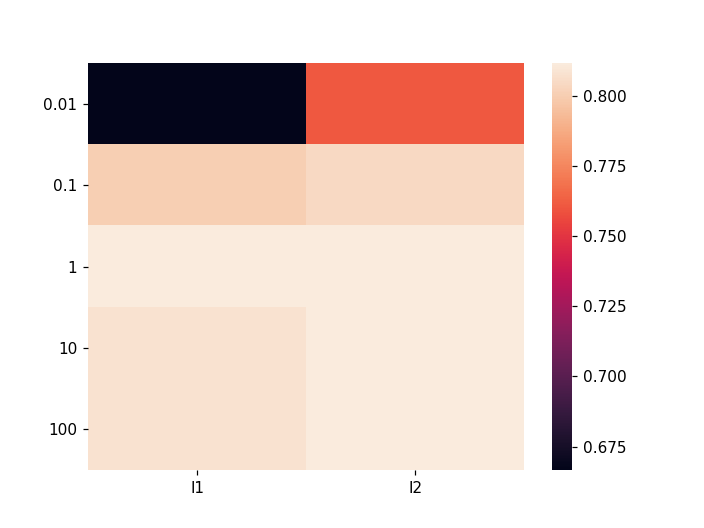

In [116]:
GridSearch_Heatmap(result)